# INSERTION SORT




In [2]:
#insertion sort

list = [2,4,3,1,5,9,6,20,50,10]

comparisons=0
def insertionsort(list,comparisons):
    for x in range(1,len(list)):
        for y in range(0,x):
            comparisons+=1
            if list[x]<list[y]:
                list=insert(list,x,y)
    
    return list,comparisons

#where index of val greater than target index
def insert(list,indexofval,targetindex):
    if indexofval>targetindex:
        list_a=list[:targetindex]
        list_b=list[targetindex:indexofval]
        list_c=list[indexofval+1:]
        final_list=list_a+[list[indexofval]]+list_b+list_c
        return final_list

def insertionsortNoComparisons(list):
    for x in range(1,len(list)):
        for y in range(0,x):
            if list[x]<list[y]:
                list=insert(list,x,y)
    
    return list

print(insertionsort(list,0))

([1, 2, 3, 4, 5, 6, 9, 10, 20, 50], 45)


# MERGE SORT

# MERGE SORT

In [3]:
def mergesort(list,comparisons):
    mid=len(list)//2
    if mid==0:
        return list,comparisons
  
    first_list=list[:mid]
    second_list=list[mid:]

    a,comparisons_a=mergesort(first_list,0)
    b,comparisons_b=mergesort(second_list,0)
    comparisons=comparisons_a+comparisons_b+comparisons
    list,comparisons=merge(a,b,comparisons)

    return list,comparisons

def merge(list_1,list_2,comparisons):
    x=0
    y=0
   
    final_list=[]
    while x < len(list_1) and y <len(list_2):
        comparisons+=1
        if list_1[x]<list_2[y]:
            final_list+=[list_1[x]]
            x+=1
        else:
            final_list+=[list_2[y]]
            y+=1
    

    while y <len(list_2):
        final_list+=[list_2[y]]
        y+=1

    while x <len(list_1):
        final_list+=[list_1[x]]
        x+=1

    return final_list,comparisons

print(mergesort([2,4,3,1,5,9,6,20,50,10],0))

def mergesortNoComparisons(list):
    mid=len(list)//2
    if mid==0:
        return list
  
    first_list=list[:mid]
    second_list=list[mid:]

    a=mergesort(first_list)
    b=mergesort(second_list)
    list=mergeNoComparisons(a,b)

    return list

def mergeNoComparisons(list_1,list_2):
    x=0
    y=0
   
    final_list=[]
    while x < len(list_1) and y <len(list_2):
        if list_1[x]<list_2[y]:
            final_list+=[list_1[x]]
            x+=1
        else:
            final_list+=[list_2[y]]
            y+=1
    

    while y <len(list_2):
        final_list+=[list_2[y]]
        y+=1

    while x <len(list_1):
        final_list+=[list_1[x]]
        x+=1

    return final_list

([1, 2, 3, 4, 5, 6, 9, 10, 20, 50], 19)


# HYBRID SORT

In [7]:

import numpy as np
def hybridsort(list,S,comparisons):
    mid=len(list)//2
    if mid==0:
        return list,S,comparisons
    first_list=list[:mid]
    second_list=list[mid:]
    if len(list)>S:
        a,S,comparisons_a=hybridsort(first_list,S,0)
        b,S,comparisons_b=hybridsort(second_list,S,0)
    else:
        a,comparisons_a=insertionsort(first_list,0)
        b,comparisons_b=insertionsort(second_list,0)
    comparisons=comparisons_a+comparisons_b+comparisons
    list,comparisons=merge(a,b,comparisons)   

    return list,S,comparisons




def insertionsort(list,comparisons):
    for i in range(1, len(list)):
 
        key = list[i]
 
        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        j = i-1
        while j >= 0 and key < list[j] :
            comparisons += 1
            list[j + 1] = list[j]
            j -= 1
        comparisons += 1
        list[j + 1] = key
    
    return list,comparisons

#where index of val greater than target index
def insert(list,indexofval,targetindex):
    final_list=[]
    if indexofval>targetindex:
        list_a=list[:targetindex]
        list_b=list[targetindex:indexofval]
        list_c=list[indexofval+1:]
        
    
        final_list.extend(list_a)
        final_list.extend([list[indexofval]])
        final_list.extend(list_b)
        final_list.extend(list_c)
       
        return final_list




def merge(list_1,list_2,comparisons):
    x=0
    y=0
    final_list=[]
    while x < len(list_1) and y <len(list_2):
        comparisons+=1
        if list_1[x]<list_2[y]:
            final_list+=[list_1[x]]
            x+=1
        else:
            final_list+=[list_2[y]]
            y+=1
    

    while y <len(list_2):
        final_list+=[list_2[y]]
        y+=1

    while x <len(list_1):
        final_list+=[list_1[x]]
        x+=1
    return final_list,comparisons

def hybridsortNoComparisons(list,S):
    mid=len(list)//2
    if mid==0:
        return list,S
    first_list=list[:mid]
    second_list=list[mid:]
    if len(list)>S:
        a,S=hybridsortNoComparisons(first_list,S)
        b,S=hybridsortNoComparisons(second_list,S)
    else:
        a=insertionsortNoComparisons(first_list,0)
        b=insertionsortNoComparisons(second_list,0)
    list=merge(a,b)   

    return list,S

arr=np.random.randint(30, size=100)

print(hybridsort(arr,10,0))



([0, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14, 15, 16, 16, 16, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29], 10, 553)


# TIME COMPLEXITY
Generate arrays of increasing sizes, in a range from 1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, ..., x], where x is the largest number you allow for your
datasets.

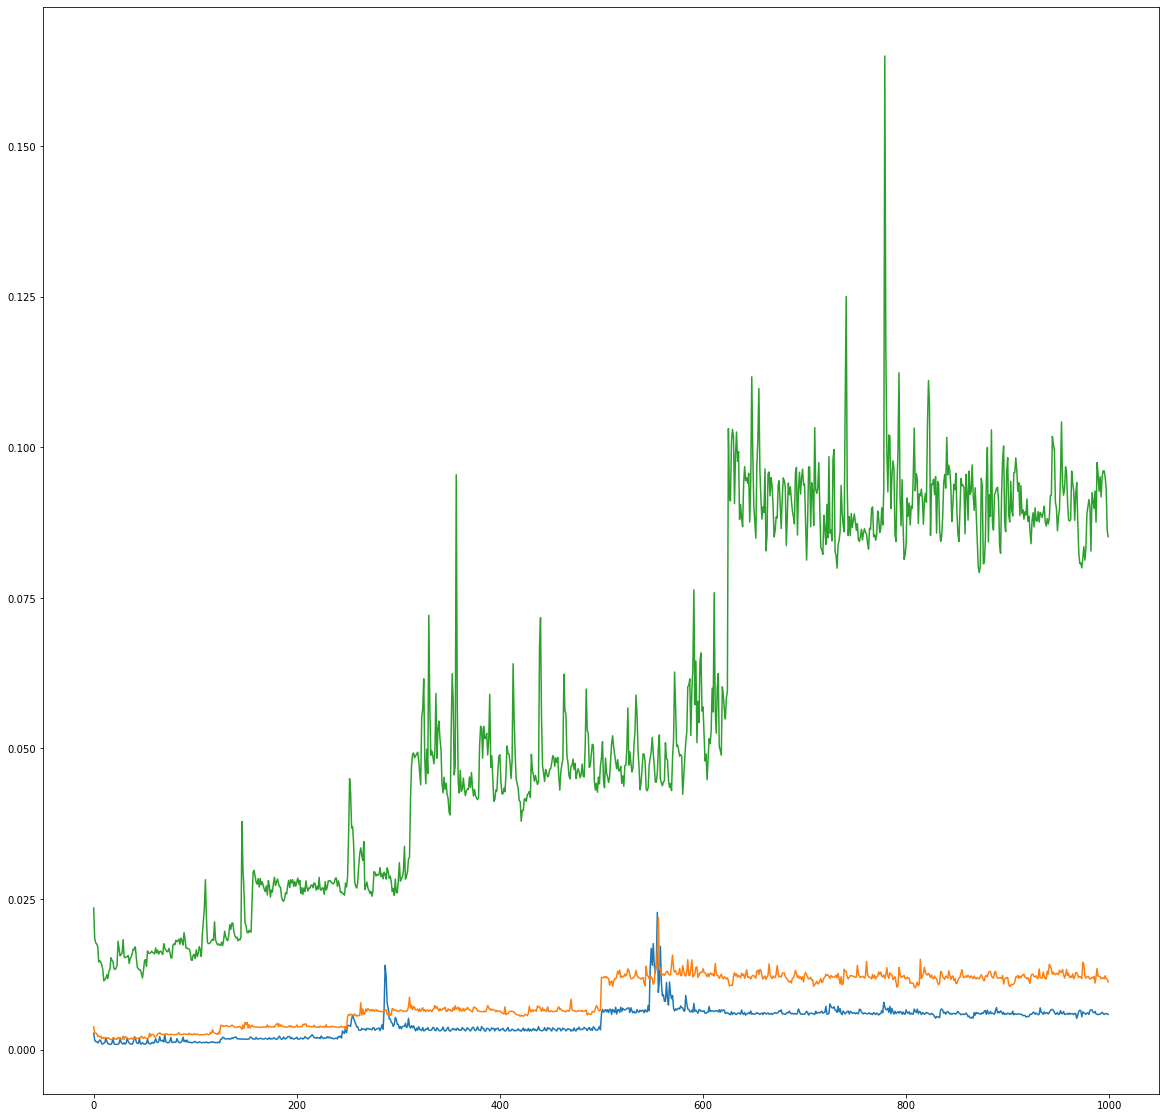

In [13]:
import time
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(22)
arr=np.random.randint(10000000, size=10000000)

s_main=[]
t_main=[]
for size in [500,1000,5000]:
    time_arr=[]
    size_arr=[]
    comp_arr=[]
    s_arr=[]
    arr=np.random.randint(1000, size=size)
    for S in range(1000):
        start_time = time.time()
        arr,ignore,comparisons = hybridsort(arr,S,0)
        s_arr+=[S]
        end_time = (time.time() - start_time)
        time_arr+=[end_time]
        comp_arr+=[comparisons]
        
    # f = plt.figure(figsize=(20,20))
    # ax = f.add_subplot(211)
    # ax.plot(s_arr, time_arr,label= str(size) )
    # ax.set_xlabel("Threshold Value S")
    # ax.set_ylabel("Time (s)")
    s_main+=[s_arr]
    t_main+=[time_arr]

f = plt.figure(figsize=(20,20))   
plt.plot(s_main[0],t_main[0],s_main[1],t_main[1],s_main[2],t_main[2])


plt.show()


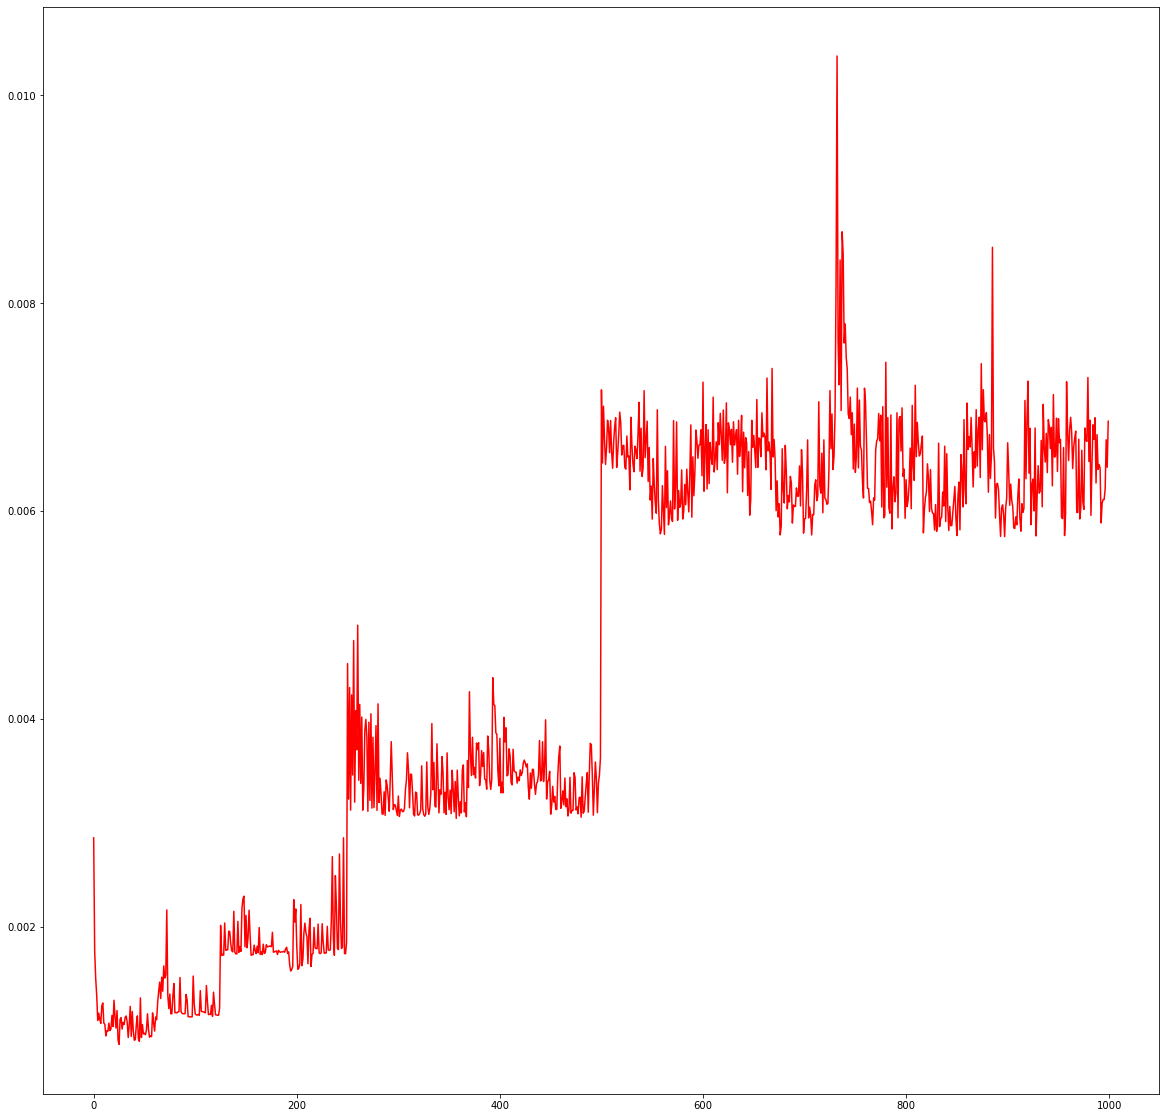

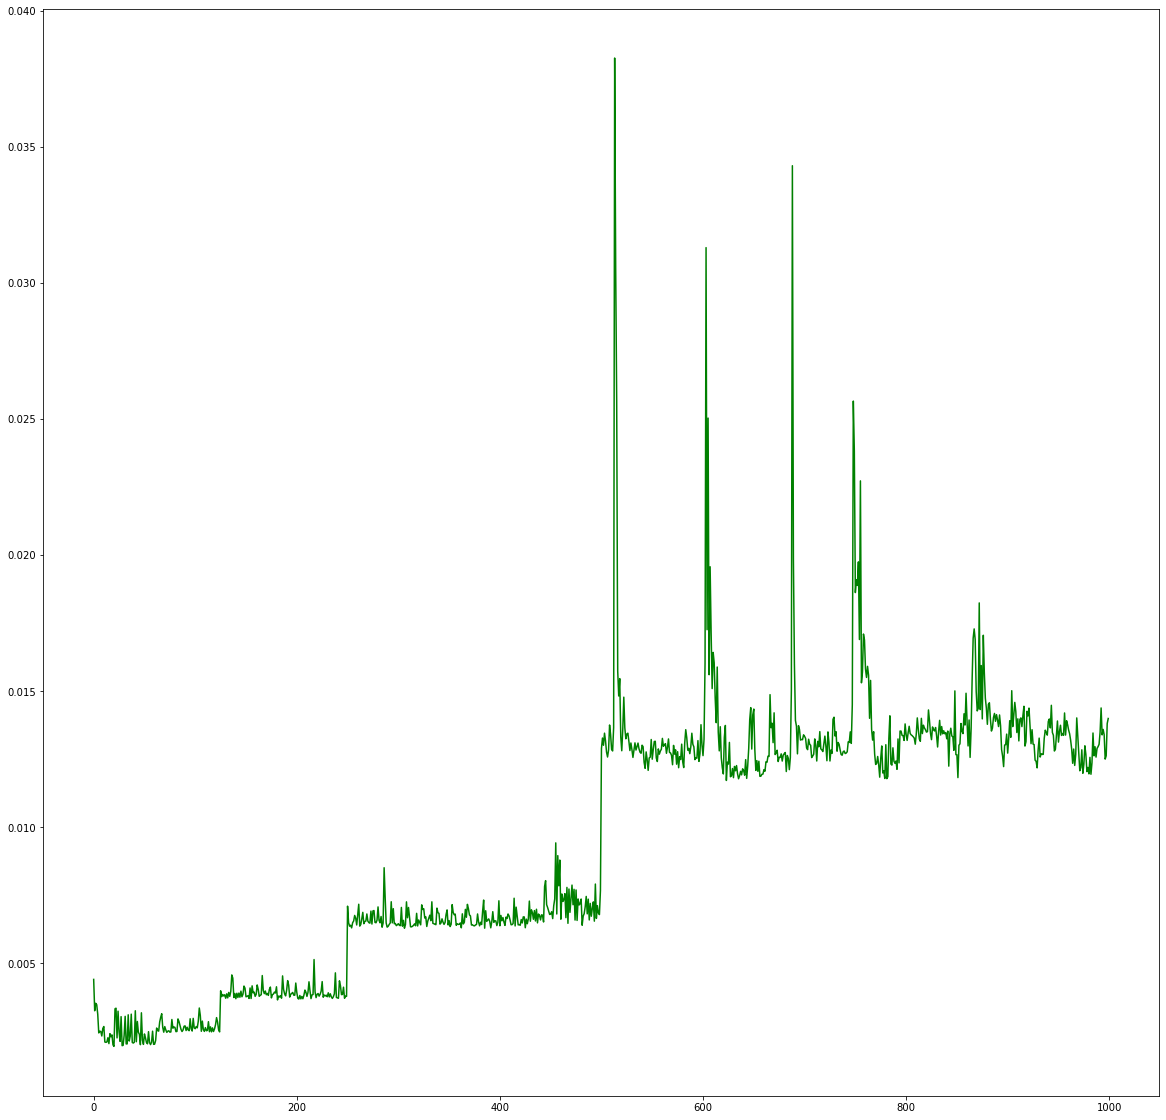

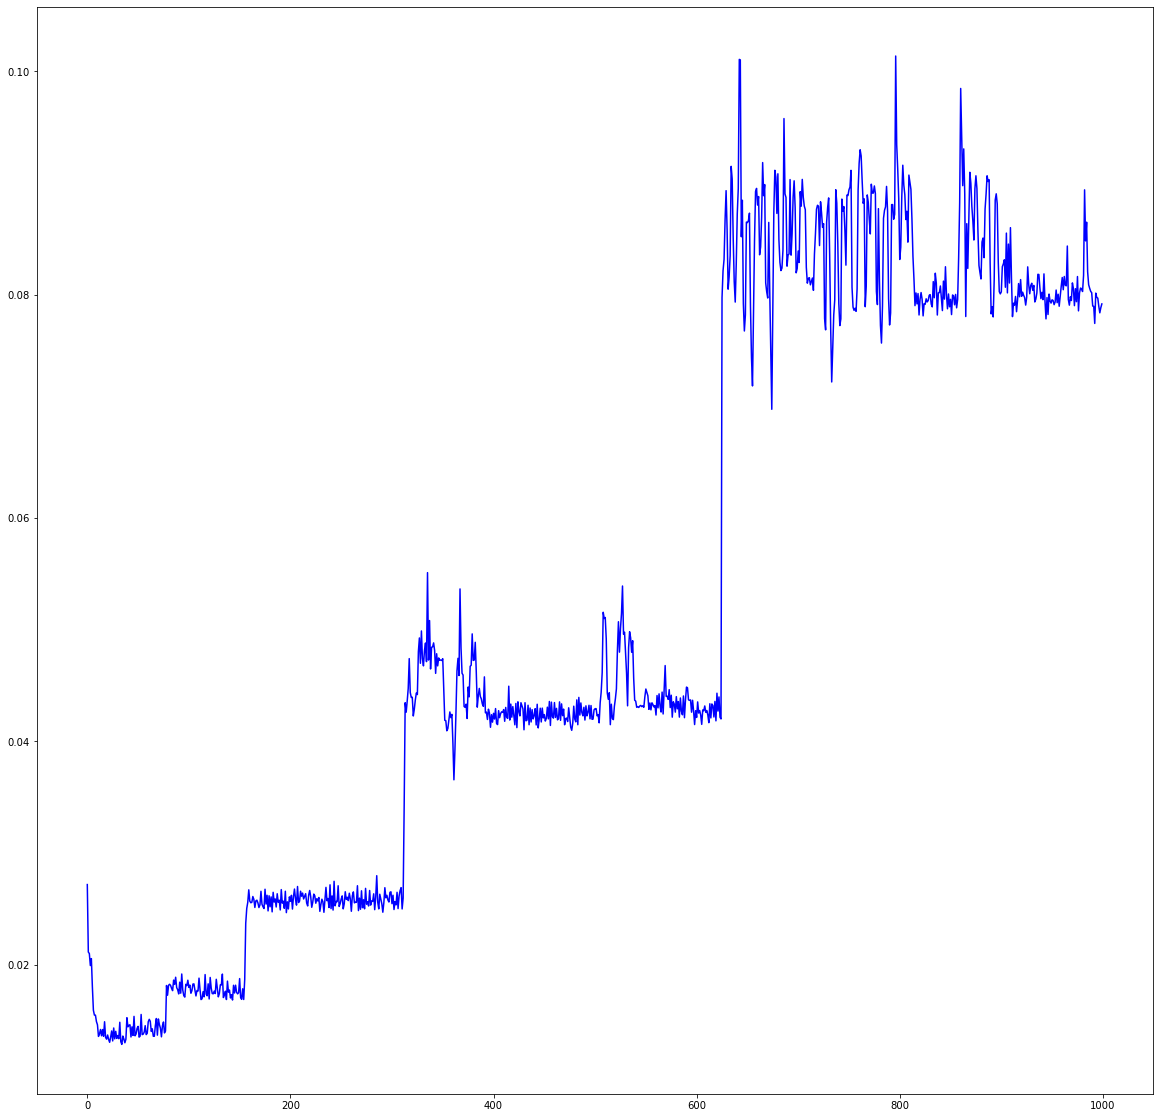

In [10]:


color=['r','g','b']
x=0
for size in [500,1000,5000]:
    
    time_arr=[]
    size_arr=[]
    comp_arr=[]
    s_arr=[]
    arr=np.random.randint(1000, size=size)
    for S in range(1000):
        start_time = time.time()
        arr,ignore,comparisons = hybridsort(arr,S,0)
        s_arr+=[S]
        end_time = (time.time() - start_time)
        time_arr+=[end_time]
        comp_arr+=[comparisons]
        
    f = plt.figure(figsize=(20,20))
    # ax = f.add_subplot(211)
    # ax.plot(s_arr, time_arr,label= str(size) )
    # ax.set_xlabel("Threshold Value S")
    # ax.set_ylabel("Time (s)")
 
    plt.plot(s_arr, time_arr,color[x])
    x+=1
    

plt.show()

# plt.plot(t, a, 'r') # plotting t, a separately 
# plt.plot(t, b, 'b') # plotting t, b separately 
# plt.plot(t, c, 'g') # plotting t, c separately 
# plt.show()

# Determining the optimal value of S

In [ ]:
sizeTimes = []
sizeComparisons = []
for size in [64,128,256,512]: # change this to compute different array sizes
    sTimes = []
    sComparisons = []
    thresholds = range(0,size) # zoom in on S between 0 and 50
    for S in thresholds:
        testtimes = []
        testcomparisons = []
        for _ in range(100):
            arr = np.random.rand(size)
            arr2 = arr.copy()

            start_time = time.time()
            arr = hybridsortNoComparisons(arr2, S, 0)
            end_time = (time.time() - start_time)
            
            arr2, comparisons = hybridsort(arr2, S, 0)

            testtimes.append(end_time)
            testcomparisons.append(comparisons)

        sTimes.append(np.mean(testtimes))
        sComparisons.append(np.mean(testcomparisons))

    sizeTimes.append((thresholds, sTimes))
    sizeComparisons.append((thresholds, sComparisons))

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
for t in sizeTimes:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1)) 
ax.set_xticks(np.arange(min(thresholds), max(thresholds)+1, 1.0))
ax.set_xlabel("Threshold Value S")
ax.set_ylabel("Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left", title = "Size")

plt.ylim(0,0.006)
plt.xlim(0,60)

ax = f.add_subplot(212)
for t in sizeComparisons:
    ax.plot(t[0], t[1], label= str(t[0][-1]+1))
ax.set_xticks(np.arange(min(thresholds), max(thresholds)+1, 1.0))
ax.set_xlabel("Threshold Value S")
ax.set_ylabel("Key Comparisons")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left",title = "Size")

plt.ylim(0,6000)
plt.xlim(0,60)
plt.show()

# Hybridsort vs Mergesort

In [19]:
import time
np.random.seed(42)
arr = np.random.rand(16777216)
start_time = time.time()
sortedArr, S, comparisons = hybridsort(arr, 7, 0)
end_time = (time.time() - start_time)
print("CPU Time:", end_time)
print("Comparisons:", comparisons)

np.random.seed(42)
arr = np.random.rand(16777216)
start_time = time.time()
sortedArr,comparisons = mergesort(arr, 0)
end_time = (time.time() - start_time)
print("CPU Time:", end_time)
print("Comparisons:", comparisons)


206.99780893325806 381435871
